In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/seattle-weather.csv')  # Use your uploaded path if needed

# Drop non-numeric & unneeded columns
df = df.drop(columns=['date', 'weather'])

# Check for nulls (there are none)
print(df.isnull().sum())
df.head()


precipitation    0
temp_max         0
temp_min         0
wind             0
dtype: int64


,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [4]:
# Features (independent variables)
X = df[['temp_min', 'precipitation', 'wind']]

# Target (dependent variable)
y = df['temp_max']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 2.71
MSE: 11.10
R² Score: 0.80


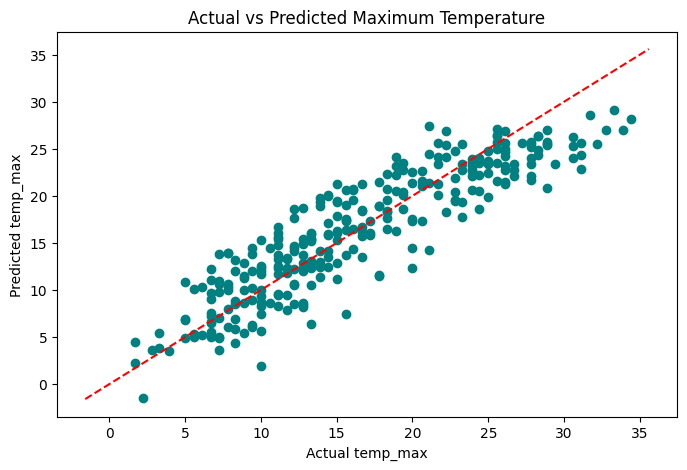

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual temp_max')
plt.ylabel('Predicted temp_max')
plt.title('Actual vs Predicted Maximum Temperature')
plt.show()


In [9]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Match features to coefficients
feature_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(feature_coef)


Intercept: 7.274348786087838
Coefficients: [ 1.25817775 -0.16520142 -0.22378771]
         Feature  Coefficient
0       temp_min     1.258178
1  precipitation    -0.165201
2           wind    -0.223788
